In [7]:
import os
import cv2
from sklearn.utils import shuffle
import numpy as np

LABEL_TO_INDEX = {'Cup':0, 'WeightTester200g':1}

# function to load images and respective labels
def load_img(directory):
  images = []
  labels = []


  for label_name in os.listdir(directory):
    if label_name not in LABEL_TO_INDEX.keys():
      print(f'Skipping {label_name}')
      continue
    for image_file_name in os.listdir(os.path.join(directory,label_name)):
      image = cv2.imread(os.path.join(directory,label_name,image_file_name))
      image = cv2.resize(image, (32,32))
      images.append(image)
      labels.append(LABEL_TO_INDEX[label_name])
  print(labels)
  return shuffle(images, labels, random_state = 40) 

def get_classlabel(class_code):
  
  labels = {0:'Cup', 1:'WeightTester200g'}
  return labels[class_code]

# load images and labels
images, labels = load_img('/Assignments/EE267_CompVision/playground/tactile_dataset/')

Img_np = np.array(images)
Label_np = np.array(labels)
print(Img_np.shape)
print(Label_np.shape)

# save images and labels
np.save('/Assignments/EE267_CompVision/playground/images.npy', Img_np)
np.save('/Assignments/EE267_CompVision/playground/labels.npy', Label_np)

loaded_images = np.load('/Assignments/EE267_CompVision/playground/images.npy')
loaded_labels = np.load('/Assignments/EE267_CompVision/playground/labels.npy')


    
    


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

{0: 300, 1: 291}
(591, 32, 32, 3)
(591,)


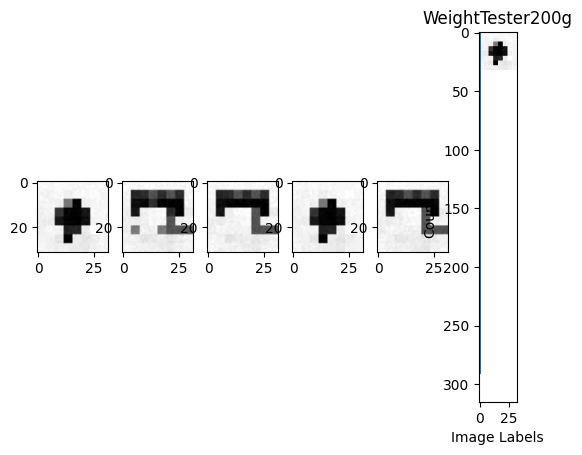

In [11]:
from random import randint
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,6)
for i in range(0,6):
    rnd_number = randint(0,len(loaded_labels))
    ax[i].imshow(loaded_images[rnd_number])

ax[i].set_title(get_classlabel(loaded_labels[rnd_number]))
label_values, count = np.unique(loaded_labels,return_counts = True)

distribution = dict(zip(label_values, count))

plt.bar(list(distribution.keys()),
distribution.values(),width = 0.6)

plt.xlabel('Image Labels')
plt.ylabel('Count')
plt.show
print(distribution)
print(loaded_images.shape)
print(loaded_labels.shape)


(442, 32, 32, 3) (85, 32, 32, 3) (64, 32, 32, 3)
(442,) (85,) (64,)


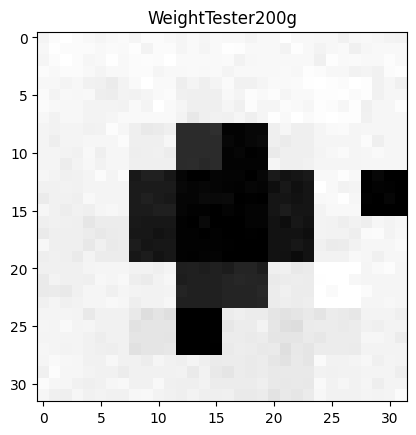

In [12]:
from sklearn.datasets import fetch_openml
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from random import randint

rnd_number = randint(0,len(loaded_labels))
plt.imshow(loaded_images[rnd_number])
plt.title(get_classlabel(loaded_labels[rnd_number]))

X_train, X_test, y_train, y_test = train_test_split(loaded_images, loaded_labels, test_size = 1/7, random_state = 42 )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1/8, random_state = 42 )
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)
np.save('/Assignments/EE267_CompVision/playground/X_test_data.npy',X_test)
np.save('/Assignments/EE267_CompVision/playground/y_test_data.npy',y_test)

In [15]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Activation, Dense

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3), padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

In [16]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
#sgd = SGD(learning_rate = 0.001)
model.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')
model.fit(X_train,y_train, batch_size=60, epochs = 8, validation_data=(X_val,y_val))

Epoch 1/8
8/8 [==============================] - 1s 42ms/step - loss: 1.7012 - accuracy: 0.4774 - val_loss: 1.3225 - val_accuracy: 0.4688
Epoch 2/8
8/8 [==============================] - 0s 25ms/step - loss: 0.9297 - accuracy: 0.4932 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 3/8
8/8 [==============================] - 0s 24ms/step - loss: 0.7221 - accuracy: 0.5045 - val_loss: 0.6871 - val_accuracy: 0.5312
Epoch 4/8
8/8 [==============================] - 0s 25ms/step - loss: 0.7128 - accuracy: 0.5068 - val_loss: 0.7012 - val_accuracy: 0.5312
Epoch 5/8
8/8 [==============================] - 0s 24ms/step - loss: 0.7350 - accuracy: 0.4977 - val_loss: 0.6872 - val_accuracy: 0.4688
Epoch 6/8
8/8 [==============================] - 0s 24ms/step - loss: 0.7028 - accuracy: 0.4955 - val_loss: 0.6823 - val_accuracy: 0.8438
Epoch 7/8
8/8 [==============================] - 0s 25ms/step - loss: 0.6993 - accuracy: 0.5158 - val_loss: 0.6785 - val_accuracy: 0.8438
Epoch 8/8
8/8 [===================

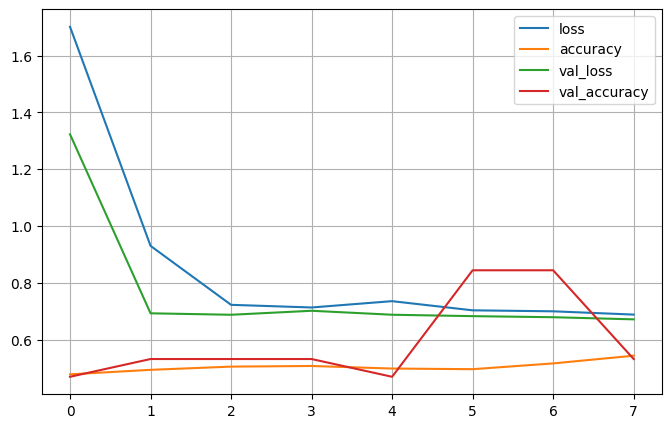

In [17]:
import pandas as pd

pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

model.save('/Assignments/EE267_CompVision/playground/tactile_model.keras')

In [18]:
#CNN Inference
trained_model = tf.keras.models.load_model('/Assignments/EE267_CompVision/playground/tactile_model.keras')
trained_model.summary()

loaded_X_test=np.load('/Assignments/EE267_CompVision/playground/X_test_data.npy')
loaded_y_test=np.load('/Assignments/EE267_CompVision/playground/y_test_data.npy')

#inference
X_test = loaded_X_test.astype('float32')/255.0
y_test = loaded_y_test.astype('uint')
loss, acc = trained_model.evaluate(X_test, y_test, verbose = 1)
print('Accuracy: %.3f' % acc)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        